## LDA

In [1]:
# necessary imports
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from pprint import pprint
import pandas as pd
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import matplotlib.pyplot as plt

In [2]:
# data
path_plot = 'data/plot_summaries.txt'
plot_summary_df = pd.read_csv(path_plot, delimiter='\t', header=None)
plot_summary_df.columns = ['movie_id', 'plot_summary']

print(plot_summary_df.shape)
plot_summary_df.head()

(42303, 2)


,movie_id,plot_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [3]:
#Create a dataframe with one cell resulting of the concatenation of the summaries
all_summaries = plot_summary_df['plot_summary'].str.cat(sep=' ')

concat_summaries_df = pd.DataFrame({'all_summaries': [all_summaries]})
print(concat_summaries_df)

                                       all_summaries
0  Shlykov, a hard-working taxi driver and Lyosha...


Code below inspired from : https://medium.com/@pinakdatta/understanding-lda-unveiling-hidden-topics-in-text-data-9bbbd25ae162

In [4]:
def text_split_origin(text) :
    
    #Initialize a set of frequent and not relevent words in english
    stop_words = set(stopwords.words('english'))

    #Remove from text all punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    #Transform all the strings into minuscules using lower function + and split them into a list of word (under string format)
    #Only keep the words that don't appear in the stop_words set
    text_splited = [word for word in text.lower().split() if word not in stop_words]
    
    return text_splited

In [14]:
def text_split_new(text) :

    #Initialize a set of frequent and not relevent words in english
    #stop_words = set(stopwords.words('english'))

    #Remove from text all punctuations
    text = re.sub(r'[^\w\s]', '', text)
    

    #Tokenise the text in words and convert in small letters
    words = word_tokenize(text)
    
    #Filter the words depending on their grammatical class
    
    text_splited = []

    for word in words:

        #Find the grammatical class (pos) of a word and tag it with it
        pos = pos_tag([word])[0][1]
        #Keep only the nouns (singular and plural)
        if pos in ['NN', 'NNS']: #and word not in stop_words:
            text_splited.append(word)
    
    return text_splited

In [6]:
def bag_of_words(text_splited) : 
    
    #Create a dictionary mapping each word to a unique id
    dictionary = Dictionary([text_splited])
    
    
    corpus = dictionary.doc2bow(text_splited)
    
    return corpus, dictionary
    
def lda(df_line) : 
    corpus, dictionary = df_line['corpus']
    
    lda_model = LdaModel([corpus], num_topics=1, id2word=dictionary)
    return lda_model

def get_topics(lda_model):
    
    return lda_model.show_topics(num_topics=1, num_words=50, formatted=True)
    
    topic_words = []

    for topic in topics:
        for word, freq in topic[1]:
            topic_words.append({'topic': topic[0], 'word': word, 'frequency': freq})

    return topic_words

In [7]:
def extract(data):

    serie = data[0][0][1] 
    
    #Get the words and their weight from the serie
    matches = re.findall(r'([\d.]+)\*"(.*?)"', serie) 
    freq_df = pd.DataFrame(matches, columns=["freq", "word"])

    #Convert the frequency in floats
    freq_df["freq"] = freq_df["freq"].astype(float) 
    
    return freq_df

In [9]:
# We transforme the type of the column plot_summary (str) into lists of str and split the words composing it
plot_summary_df['split'] = plot_summary_df['plot_summary'].apply(text_split_origin)


In [20]:
#we convert the splited lists into bag-of-words
plot_summary_df['corpus'] = plot_summary_df['split'].apply(bag_of_words)

In [21]:
# Train the LDA model
plot_summary_df['lda'] = plot_summary_df.apply(lda, axis=1)

In [33]:
pprint(plot_summary_df['lda'].apply(get_topics).tolist())

Grouper les résumés par décennie.

In [ ]:
# We transforme the type of the column all_summaries (str) into lists of str and split the words composing it
concat_summaries_df['split'] = concat_summaries_df['all_summaries'].apply(text_split_new)


In [ ]:
#we convert the splited lists into bag-of-words
concat_summaries_df['corpus'] = concat_summaries_df['split'].apply(bag_of_words)

In [ ]:
# Train the LDA model
concat_summaries_df['lda'] = concat_summaries_df.apply(lda, axis=1)

In [ ]:
pprint(concat_summaries_df['lda'].apply(get_topics).tolist())

In [11]:
#Apply the LDA on specific decades

#Import the films in the selected decades, exported for genre_analysis.ipynb
films_decade_1940s = pd.read_csv('films_decade_1940s.csv')
films_decade_1980s = pd.read_csv('films_decade_1980s.csv')

print(films_decade_1940s.head())
print(films_decade_1940s.shape)

print(films_decade_1980s.head())
print(films_decade_1980s.shape)

   Wikipedia_movie_ID Freebase_Movie_ID Movie_release_date Character_name  \
0             4340003         /m/0bxzzd         1947-08-21            NaN   
1             4340003         /m/0bxzzd         1947-08-21            NaN   
2             4340003         /m/0bxzzd         1947-08-21            NaN   
3             4340003         /m/0bxzzd         1947-08-21            NaN   
4             4340003         /m/0bxzzd         1947-08-21            NaN   

  Actor_date_of_birth Actor_gender  Actor_height Actor_ethnicity  \
0          1886-09-24            M           NaN             NaN   
1          1882-05-23            M           NaN             NaN   
2          1918-10-17            F          1.68       /m/033tf_   
3          1914-12-13            M           NaN             NaN   
4          1886-03-18            M           NaN             NaN   

              Actor_name  Actor_age_at_movie_release  ...     Movie_name  \
0            James Burke                         NaN

In [12]:
#Apply the LDA on the films in the 1940s

filtered_summaries_40s = plot_summary_df[plot_summary_df['movie_id'].isin(films_decade_1940s['Wikipedia_movie_ID'])]

print(filtered_summaries_40s.head())
print(filtered_summaries_40s.shape)

#Put all summaries together in one column
all_summaries_40s = filtered_summaries_40s['plot_summary'].str.cat(sep=' ')

all_summaries_40s = pd.DataFrame({'all_summaries': [all_summaries_40s]})
print("concatenated version:", all_summaries_40s)

     movie_id                                       plot_summary  \
8     2462689  Infuriated at being told to write one final co...   
30     447194  Samson, a Hebrew placed under Nazirite vows fr...   
80   32163620  In the winter of 1945, immediately after the l...   
107  28177482  Handcuffed together, George Martin ([[Jack War...   
126  19757981  The gang unintentionally wreaks havoc at the g...   

                                                 split  
8    [infuriated, told, write, one, final, column, ...  
30   [samson, hebrew, placed, nazirite, vows, birth...  
80   [winter, 1945, immediately, liberation, jean, ...  
107  [handcuffed, together, george, martin, jack, w...  
126  [gang, unintentionally, wreaks, havoc, gala, h...  
(1198, 3)
concatenated version:                                        all_summaries
0  Infuriated at being told to write one final co...


In [15]:
print(all_summaries_40s.shape)

#Use the created functions to get the most frequents words and their frequencies

all_summaries_40s['split'] = all_summaries_40s['all_summaries'].apply(text_split_new)
all_summaries_40s['corpus'] = all_summaries_40s['split'].apply(bag_of_words)
all_summaries_40s['lda'] = all_summaries_40s.apply(lda, axis=1)

#Print the resulting serie
#pprint(all_summaries_40s['lda'].apply(get_topics).tolist())

#Collect the serie in a variable
word_freq_40s = all_summaries_40s['lda'].apply(get_topics)

print(type(word_freq_40s))

(1, 1)
<class 'pandas.core.series.Series'>


In [16]:
#Extract the data from the serie and add it to a dataframe
topics_40s = extract(word_freq_40s)
print(topics_40s)

     freq     word
0   0.004    tells
1   0.003      man
2   0.003     love
3   0.003     Bugs
4   0.003    finds
5   0.003    tries
6   0.003     home
7   0.003     time
8   0.002   police
9   0.002     wife
10  0.002    night
11  0.002    Jerry
12  0.002    house
13  0.002     film
14  0.002     life
15  0.002    money
16  0.002      way
17  0.002  becomes
18  0.002   father
19  0.002   leaves
20  0.002    turns
21  0.002    woman
22  0.002  returns
23  0.002   friend
24  0.002     help
25  0.002       Dr
26  0.002      men
27  0.002    death
28  0.002   family
29  0.002  decides
30  0.002    story
31  0.002     town
32  0.002   mother
33  0.002     room
34  0.002      day
35  0.002   begins
36  0.002     work
37  0.001  husband
38  0.001    Daffy
39  0.001    falls
40  0.001     head
41  0.001     asks
42  0.001   escape
43  0.001      son
44  0.001     sees
45  0.001      end
46  0.001      job
47  0.001  arrives
48  0.001    train
49  0.001     runs


In [17]:
#Set the words as index of the dataframe
topics_40s.set_index('word', inplace = True)
print(topics_40s)

          freq
word          
tells    0.004
man      0.003
love     0.003
Bugs     0.003
finds    0.003
tries    0.003
home     0.003
time     0.003
police   0.002
wife     0.002
night    0.002
Jerry    0.002
house    0.002
film     0.002
life     0.002
money    0.002
way      0.002
becomes  0.002
father   0.002
leaves   0.002
turns    0.002
woman    0.002
returns  0.002
friend   0.002
help     0.002
Dr       0.002
men      0.002
death    0.002
family   0.002
decides  0.002
story    0.002
town     0.002
mother   0.002
room     0.002
day      0.002
begins   0.002
work     0.002
husband  0.001
Daffy    0.001
falls    0.001
head     0.001
asks     0.001
escape   0.001
son      0.001
sees     0.001
end      0.001
job      0.001
arrives  0.001
train    0.001
runs     0.001


<Figure size 1000x600 with 0 Axes>

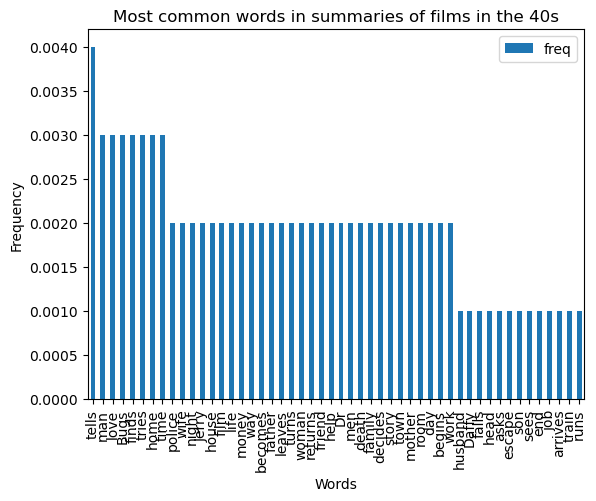

In [18]:
#Plot the freqencies of the words
plt.figure(figsize=(10, 6))
topics_40s.plot(kind='bar')

plt.title('Most common words in summaries of films in the 40s')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

In [19]:
#Apply the LDA on the films in the 1980s

filtered_summaries_80s = plot_summary_df[plot_summary_df['movie_id'].isin(films_decade_1980s['Wikipedia_movie_ID'])]

print(filtered_summaries_80s.head())
print(filtered_summaries_80s.shape)
all_summaries_80s = filtered_summaries_80s['plot_summary'].str.cat(sep=' ')

#Put all summaries together in one column
all_summaries_80s = pd.DataFrame({'all_summaries': [all_summaries_80s]})
print("concatenated version:", all_summaries_80s)

    movie_id                                       plot_summary  \
4     595909  Seventh-day Adventist Church pastor Michael Ch...   
17   4018288  Debbie's favorite band is Dream Street, and he...   
20  15585766  Three friends are droving cattle in Australia ...   
29   2254491  Preetam , a struggling cartoonist, meets Anita...   
31  24165951  A soldier-of-fortune steals some Russian nerve...   

                                                split  
4   [seventhday, adventist, church, pastor, michae...  
17  [debbies, favorite, band, dream, street, favor...  
20  [three, friends, droving, cattle, australia, 1...  
29  [preetam, struggling, cartoonist, meets, anita...  
31  [soldieroffortune, steals, russian, nerve, gas...  
(9393, 3)
concatenated version:                                        all_summaries
0  Seventh-day Adventist Church pastor Michael Ch...


In [20]:
#Use the created functions to get the most frequents words and their frequencies
print(all_summaries_80s.shape)

all_summaries_80s['split'] = all_summaries_80s['all_summaries'].apply(text_split_new)
all_summaries_80s['corpus'] = all_summaries_80s['split'].apply(bag_of_words)
all_summaries_80s['lda'] = all_summaries_80s.apply(lda, axis=1)

#Print the resulting serie
#pprint(all_summaries_80s['lda'].apply(get_topics).tolist())

#Collect the serie in a variable
word_freq_80s = all_summaries_80s['lda'].apply(get_topics)

(1, 1)


In [21]:
#Extract the data from the serie and add it to a dataframe
topics_80s = extract(word_freq_80s)
print(topics_80s)

     freq      word
0   0.004      film
1   0.004      love
2   0.004    father
3   0.004      life
4   0.003       man
5   0.003      time
6   0.003      home
7   0.003     tells
8   0.003    family
9   0.003     house
10  0.003     finds
11  0.003    mother
12  0.003      wife
13  0.002       day
14  0.002       son
15  0.002    police
16  0.002      help
17  0.002     tries
18  0.002     money
19  0.002     night
20  0.002     story
21  0.002    friend
22  0.002   becomes
23  0.002   friends
24  0.002  daughter
25  0.002       men
26  0.002       car
27  0.002   decides
28  0.002     woman
29  0.002       way
30  0.002     death
31  0.002    begins
32  0.002     years
33  0.002      girl
34  0.002     meets
35  0.002    leaves
36  0.002      town
37  0.002    school
38  0.002   returns
39  0.002      asks
40  0.002       end
41  0.001     falls
42  0.001     group
43  0.001      work
44  0.001      kill
45  0.001    return
46  0.001    become
47  0.001      ends
48  0.001    people


In [22]:
#Set the words as index of the dataframe
topics_80s.set_index('word', inplace = True)
print(topics_80s)

           freq
word           
film      0.004
love      0.004
father    0.004
life      0.004
man       0.003
time      0.003
home      0.003
tells     0.003
family    0.003
house     0.003
finds     0.003
mother    0.003
wife      0.003
day       0.002
son       0.002
police    0.002
help      0.002
tries     0.002
money     0.002
night     0.002
story     0.002
friend    0.002
becomes   0.002
friends   0.002
daughter  0.002
men       0.002
car       0.002
decides   0.002
woman     0.002
way       0.002
death     0.002
begins    0.002
years     0.002
girl      0.002
meets     0.002
leaves    0.002
town      0.002
school    0.002
returns   0.002
asks      0.002
end       0.002
falls     0.001
group     0.001
work      0.001
kill      0.001
return    0.001
become    0.001
ends      0.001
people    0.001
village   0.001


<Figure size 1000x600 with 0 Axes>

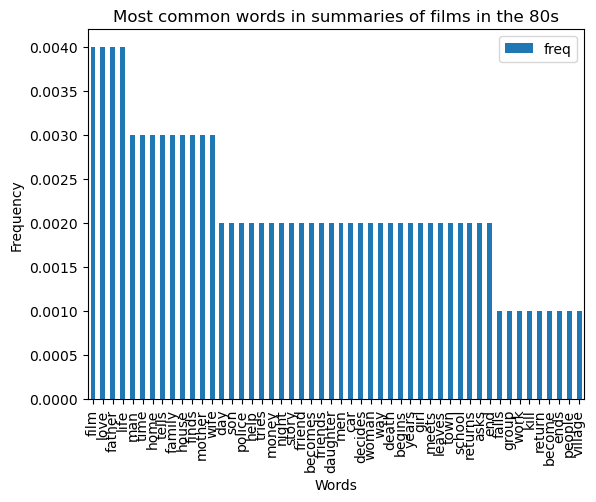

In [23]:
#Plot the freqencies of the words
plt.figure(figsize=(10, 6))
topics_80s.plot(kind='bar')

plt.title('Most common words in summaries of films in the 80s')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

In [24]:
#Find words that are unique to the dataframe and keep them in a new dataframe
uni_index_80s = topics_80s.index.difference(topics_40s.index)
uni_index_40s = topics_40s.index.difference(topics_80s.index)

#Select only the words that are unique to a decade
unique_80s = topics_80s.loc[uni_index_80s]
unique_40s = topics_40s.loc[uni_index_40s]

#Sort by the frequencies
unique_80s = unique_80s.sort_values(by='freq', ascending=False)
unique_40s = unique_40s.sort_values(by='freq', ascending=False)

print(unique_80s)
print(unique_40s)

           freq
word           
car       0.002
daughter  0.002
friends   0.002
girl      0.002
meets     0.002
school    0.002
years     0.002
become    0.001
ends      0.001
group     0.001
kill      0.001
people    0.001
return    0.001
village   0.001
          freq
word          
Bugs     0.003
Dr       0.002
Jerry    0.002
room     0.002
turns    0.002
Daffy    0.001
arrives  0.001
escape   0.001
head     0.001
husband  0.001
job      0.001
runs     0.001
sees     0.001
train    0.001


<Figure size 1000x600 with 0 Axes>

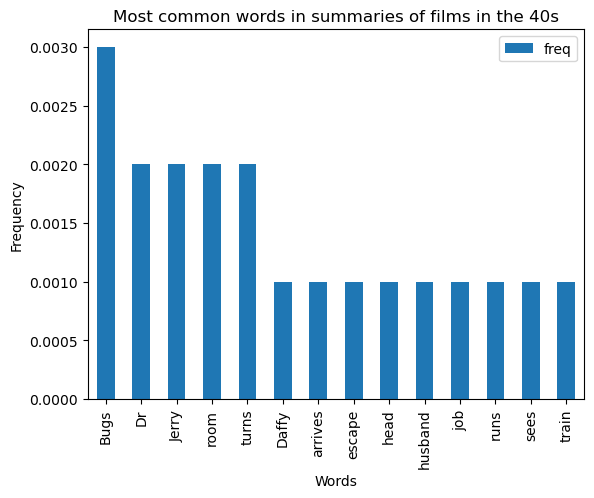

In [25]:
#Plot the frequencies of the words unique to this decade
plt.figure(figsize=(10, 6))
unique_40s.plot(kind='bar')

plt.title('Most common words in summaries of films in the 40s')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

<Figure size 1000x600 with 0 Axes>

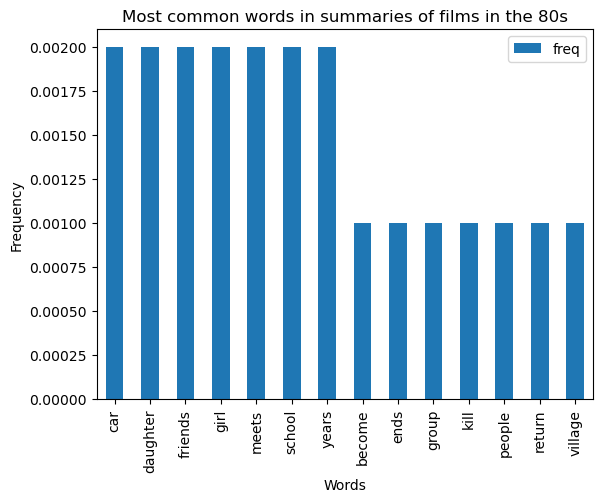

In [26]:
#Plot the frequencies of the words unique to this decade
plt.figure(figsize=(10, 6))
unique_80s.plot(kind='bar')

plt.title('Most common words in summaries of films in the 80s')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()